<a href="https://colab.research.google.com/github/roshangeoroy/CommunicationSimulations/blob/main/BPSK_%26_QPSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BPSK
1. Generate a string of message bits.
2. Encode using BPSK with energy per bit Eb and represent it using points in
a signal-space.
3. Simulate transmission of the BPSK modulated signal via an AWGN
channel with variance N0/2.
4. Detect using an ML decoder and plot the probability of error as a function
of SNR per bit Eb/N0.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#Bit Generation
def bitG(a):
  b=np.random.randint(low=0,high=2,size=a)
  return b

In [11]:
def power(s):
  s=np.linalg.norm(s)/s.size
  return s

In [12]:
def energy(s):
  s=np.linalg.norm(s)
  return s

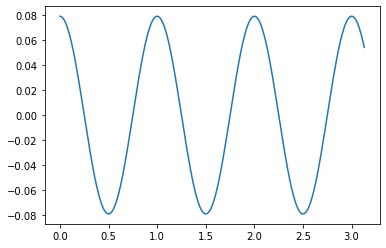

In [25]:
#creating Carrier Signal
t=np.arange(0,3.14,0.01)
s=np.cos(2*np.pi*t)
s=s/energy(s)
plt.plot(t,s);

In [101]:
b=bitG(50)
k=np.array([])
for bit in b:
  if bit==0:
    k=np.concatenate([k,s])
  else:
    k=np.concatenate([k,-s])
print(b)

[1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 0 0 1 1 0 1 0 1 0 1 0 0 0]


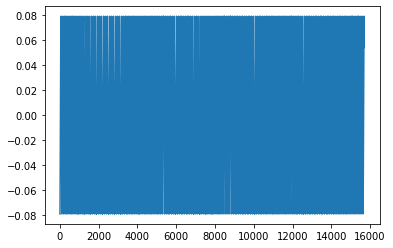

In [102]:
plt.plot(k)

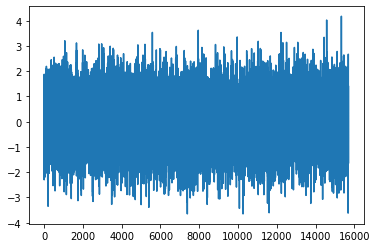

In [103]:
n=np.random.normal(0,1,int(s.size*b.size))
k=k+n
plt.plot(k)

In [104]:
G=np.split(k,int(k.size/s.size))
h=[]
for ar in G:
  h.append(np.sum(s*ar))

print(h)

[-1.191717737879642, 1.5047383249197794, -1.273124049128508, -1.3790003221892775, 0.4987546745365114, -0.24131158041019996, -0.9540210324170002, -2.4434761091443167, -0.5025367956510663, -1.801906073642615, -1.6000635141055455, 1.1575947191607092, -0.6377689027031592, -2.0066031805451225, 0.036889294581631205, -2.4233585820164967, 1.4030595625828142, 0.7611700604833322, -2.570411225157746, 0.5077152027812307, 0.9472394702167101, -0.9984814917901406, -0.9364999685407114, 0.5305610276650657, -1.6604484498133345, 0.3423347271383983, 0.7741593232445294, 0.6347491804961118, 0.1580676413497677, -0.4111488380983188, -0.07719700836236698, -1.079852552283805, -1.0236945063385294, 0.9758382593425258, -0.20071724675832464, -0.06275507332106475, -1.507184049890662, 1.7277567440953794, 0.980622835443068, -2.044170087640798, -0.8173072687453791, 2.5081482343111334, -1.2555698129171868, 1.8550545518979742, -1.499124768386955, 0.11937905917668257, -2.1254015776781774, 1.8338089491100131, 1.14620177642

[1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0]
0.12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


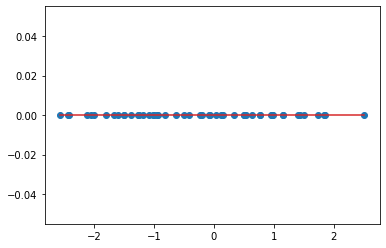

In [105]:
x=[]
for i in h:
  if i<=0:
    x.append(1)
  else:
    x.append(0)
plt.stem(h,np.zeros_like(x))
print(x)
err=0
for i in range(len(x)):
  if x[i]!=b[i]:
    err=err+1
error=err/len(x)
print(error)